In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('../datasets/tweets_ostrava_translated.csv', header=None)
df.columns = ['author_id', 'text_orig', 'date_published', 'likes', 'retweets', 'text_en']
df.head()

,author_id,text_orig,date_published,likes,retweets,text_en
0,2765861635,"Bohuzel budou do Tutecka letat dale, jen tank...",2023-03-17 02:58:29+00:00,4,1,"Unfortunately, they will continue to fly to T..."
1,946371211411513346,Já si mohu uložit tvé fotky? Bez svolení? To ...,2023-03-17 00:40:37+00:00,0,0,Can I save your pictures? Without permission?...
2,729345398,"Arsenal-Sporting, 3 hodiny zábavy 👌",2023-03-16 22:47:06+00:00,7,1,"Arsenal-Sporting, 3 hours of fun 👌"
3,864219563172532224,Levice si mne získala již ve velmi útlém věku. ✨,2023-03-16 21:21:56+00:00,31,2,The left won me over at a very young age. ✨
4,917807011152191494,tim jsem byla posedla kdyz mi bylo 11 let,2023-03-16 20:18:15+00:00,7,1,I was obsessed with it when I was 11 years old.


In [3]:
df['sentiment'] = [TextBlob(t).sentiment.polarity if type(t) == str else 0 for t in df['text_en']]
df['len_orig'] = df['text_orig'].apply(lambda t: len(t) if type(t) == str else -1)
df.head()

,author_id,text_orig,date_published,likes,retweets,text_en,sentiment,len_orig
0,2765861635,"Bohuzel budou do Tutecka letat dale, jen tank...",2023-03-17 02:58:29+00:00,4,1,"Unfortunately, they will continue to fly to T...",0.150,64
1,946371211411513346,Já si mohu uložit tvé fotky? Bez svolení? To ...,2023-03-17 00:40:37+00:00,0,0,Can I save your pictures? Without permission?...,0.050,103
2,729345398,"Arsenal-Sporting, 3 hodiny zábavy 👌",2023-03-16 22:47:06+00:00,7,1,"Arsenal-Sporting, 3 hours of fun 👌",0.300,35
3,864219563172532224,Levice si mne získala již ve velmi útlém věku. ✨,2023-03-16 21:21:56+00:00,31,2,The left won me over at a very young age. ✨,0.065,49
4,917807011152191494,tim jsem byla posedla kdyz mi bylo 11 let,2023-03-16 20:18:15+00:00,7,1,I was obsessed with it when I was 11 years old.,-0.200,42


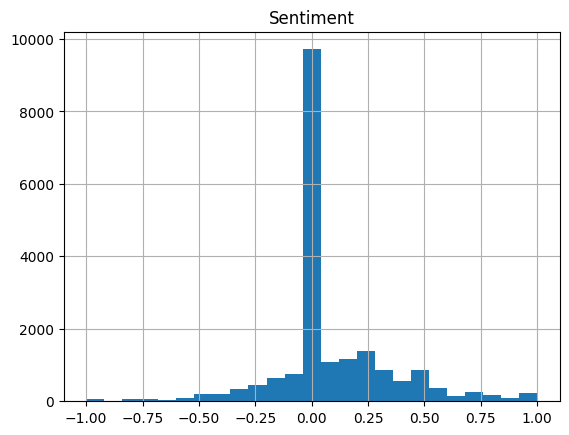

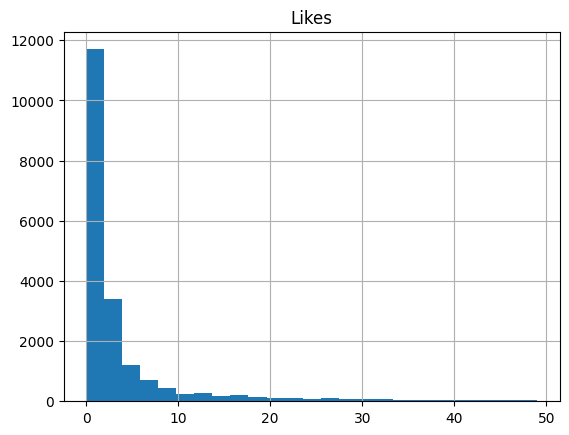

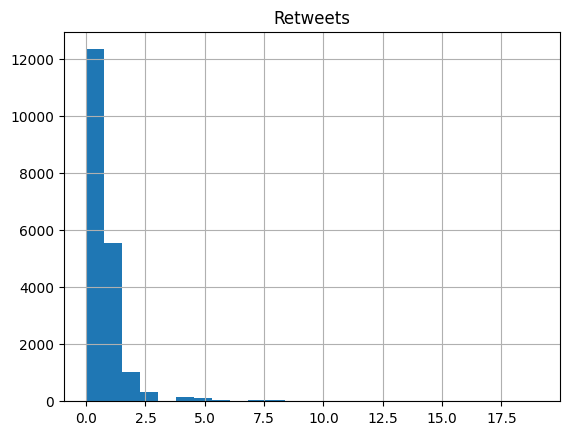

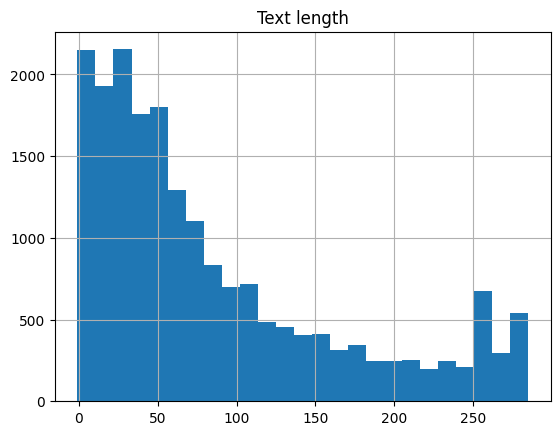

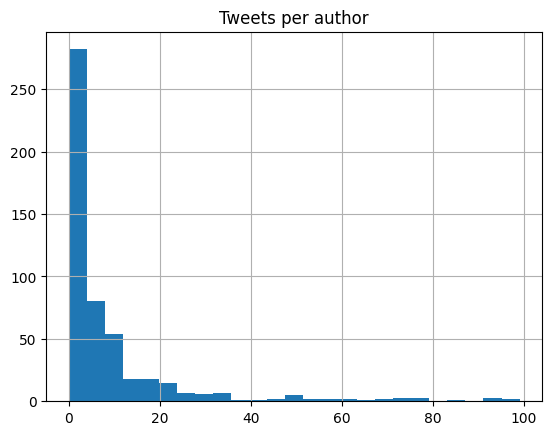

          author_id         likes      retweets     sentiment      len_orig
count  1.976400e+04  19764.000000  19764.000000  19764.000000  19764.000000
mean   8.161986e+17      8.102712      0.741449      0.085799     85.481937
std    5.614801e+17     80.733792      4.561658      0.267052     78.499980
min    5.212571e+06      0.000000      0.000000     -1.000000     -1.000000
25%    3.304618e+09      0.000000      0.000000      0.000000     26.000000
50%    9.463712e+17      1.000000      0.000000      0.000000     57.000000
75%    1.273132e+18      3.000000      1.000000      0.200000    122.000000
max    1.634810e+18   4171.000000    304.000000      1.000000    285.000000
count     554.000000
mean       35.380866
std       169.435904
min         0.000000
25%         1.000000
50%         3.000000
75%        11.000000
max      2956.000000
Name: text_orig, dtype: float64
author_id
993330225378406400     2956
867470194658205698     1646
900292704042704896     1114
3304618079            

In [4]:
df['sentiment'].hist(bins=25)
plt.title('Sentiment')
plt.show()
df[df['likes'] < 50]['likes'].hist(bins=25)
plt.title('Likes')
plt.show()
df[df['retweets'] < 20]['retweets'].hist(bins=25)
plt.title('Retweets')
plt.show()
df[df['len_orig'] < 1000]['len_orig'].hist(bins=25)
plt.title('Text length')
plt.show()

plt.title('Tweets per author')
per_author_cnt = df.groupby('author_id').count()['text_orig']
per_author_cnt[per_author_cnt < 100].hist(bins=25)
plt.show()

print(df.describe())
print(per_author_cnt.describe())
print(per_author_cnt.sort_values(ascending=False))


In [8]:
df[df['author_id'] == 993330225378406400][:25]

,author_id,text_orig,date_published,likes,retweets,text_en,sentiment,len_orig,sentiment_abs
10,993330225378406400,"Bodejť by nebyl génius, když jeho děda byl s...",2023-03-16 18:30:20+00:00,7,2,Wouldn't he be a genius if his grandfather w...,0.000000,65,0.000000
49,993330225378406400,🤣✅,2023-03-16 10:55:43+00:00,0,0,🤣✅,0.000000,4,0.000000
60,993330225378406400,Logický nesmysl. Kromě stání mohou taky v řad...,2023-03-16 08:33:22+00:00,22,1,"Logical nonsense. Besides standing, they can ...",-0.075000,63,0.075000
62,993330225378406400,"Nepotřebují, mají dost židovského zlata.✅",2023-03-16 08:27:15+00:00,2,0,"They don't need to, they have enough Jewish...",0.000000,44,0.000000
69,993330225378406400,Když jsem se hluboce zamyslel (jinak to ani...,2023-03-16 07:26:23+00:00,1,1,After thinking deeply (I can't do it any ot...,-0.085000,279,0.085000
74,993330225378406400,U nás taky. 🤩✅\nA radiační situace se zda b...,2023-03-16 06:21:12+00:00,2,0,So did we. 🤩✅\nAnd the radiation situation ...,0.000000,66,0.000000
76,993330225378406400,"Ivoši, Mileno, máte pravdu. Ještě, že stejn...",2023-03-16 06:05:00+00:00,1,1,"Ivos, Milena, you're right. It's a good thi...",0.447619,193,0.447619
78,993330225378406400,"veterána z Afganistánu, kterému z internetov...",2023-03-16 05:56:40+00:00,0,0,...an Afghanistan veteran whose Internet cru...,0.039683,122,0.039683
80,993330225378406400,"Veroniko, mi hlavně vadí ta generalizace. Kd...",2023-03-16 05:51:12+00:00,0,1,"Veronica, what bothers me is the generalizat...",0.125000,275,0.125000
102,993330225378406400,Co se dá dělat.🤔😱✅,2023-03-15 21:04:58+00:00,0,0,What can be done.🤔😱✅,0.000000,20,0.000000


In [5]:
df['sentiment_abs'] = df['sentiment'].abs()
df[['sentiment', 'sentiment_abs', 'likes', 'retweets', 'len_orig']].corr()

,sentiment,sentiment_abs,likes,retweets,len_orig
sentiment,1.000000,0.512364,0.008684,-0.012124,0.013051
sentiment_abs,0.512364,1.000000,0.011188,0.017732,0.073971
likes,0.008684,0.011188,1.000000,0.709140,0.044542
retweets,-0.012124,0.017732,0.709140,1.000000,0.068520
len_orig,0.013051,0.073971,0.044542,0.068520,1.000000


In [6]:
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return p

r_pvalues(df[['sentiment', 'sentiment_abs', 'likes', 'retweets', 'len_orig']])

,sentiment,sentiment_abs,likes,retweets,len_orig
sentiment,0.0,0.0,0.2222,0.0883,0.0665
sentiment_abs,0.0,0.0,0.1158,0.0127,0.0
likes,0.2222,0.1158,0.0,0.0,0.0
retweets,0.0883,0.0127,0.0,0.0,0.0
len_orig,0.0665,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'likes'}>,
        <Axes: title={'center': 'retweets'}>],
       [<Axes: title={'center': 'sentiment'}>,
        <Axes: title={'center': 'len_orig'}>]], dtype=object)

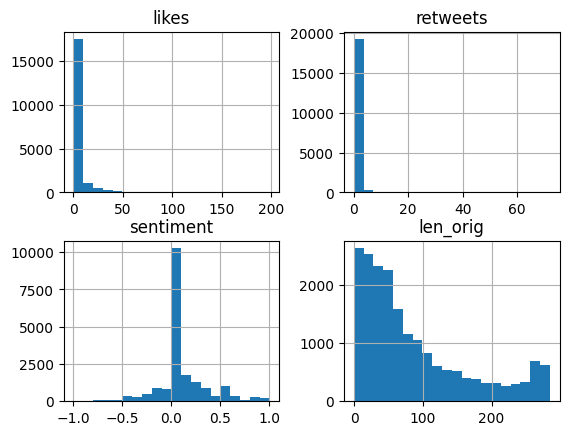

In [7]:
df[['likes', 'retweets', 'sentiment', 'len_orig']][df['likes'] < 200].hist(bins=20)